## 2. 셀프 주유소가 정말 저렴하나? - 데이터 확보하기 위한 작업
- https://www.opinet.co.kr/searRgSelect.do
- 목표데이터
    - 브랜드
    - 가격
    - 셀프 주유 여부
    - 위치

## 3. 셀레니움 접근

In [1]:
from selenium import webdriver

In [2]:
from selenium.webdriver.common.by import By

In [3]:
# 페이지 접근
url = 'https://www.opinet.co.kr/searRgSelect.do'
driver = webdriver.Chrome()
driver.get(url)

In [4]:
#지역 : 시/도

sido_list_raw = driver.find_element(By.ID, 'SIDO_NM0') #부모 태그
sido_list_raw.text

'            시/도\n            \n             \n             \n              서울\n             \n            \n             \n             \n              부산\n             \n            \n             \n             \n              대구\n             \n            \n             \n             \n              인천\n             \n            \n             \n             \n              광주\n             \n            \n             \n             \n              대전\n             \n            \n             \n             \n              울산\n             \n            \n             \n             \n              세종\n             \n            \n             \n              경기\n             \n             \n            \n             \n             \n              강원\n             \n            \n             \n             \n              충북\n             \n            \n             \n             \n              충남\n             \n            \n             \n             \n              

In [8]:
sido_list = sido_list_raw.find_elements(By.TAG_NAME, 'option')
# element에서 복수(s) 형태로 바꿔야 다수의 데이터 출력 가능
len(sido_list), sido_list[17].text

(18, '제주')

In [9]:
sido_list[1].get_attribute('value')
# get_attribute = 태그의 속성값을 가져오는 메써드
# <option value="서울특별시">서울</option> 중 value 의 속성값인 "서울특별시" 데이터 가져오기

'서울특별시'

In [10]:
sido_names = []

for option in sido_list:
    sido_names.append(option.get_attribute('value'))
sido_names

['',
 '서울특별시',
 '부산광역시',
 '대구광역시',
 '인천광역시',
 '광주광역시',
 '대전광역시',
 '울산광역시',
 '세종특별자치시',
 '경기도',
 '강원특별자치도',
 '충청북도',
 '충청남도',
 '전북특별자치도',
 '전라남도',
 '경상북도',
 '경상남도',
 '제주특별자치도']

In [11]:
sido_names = [option.get_attribute('value')
             for option in sido_list] # 리스트안에 for문을 통해 데이터를 한번에 담기
sido_names[:5] # 0번째에 공백 데이터 발생

['', '서울특별시', '부산광역시', '대구광역시', '인천광역시']

In [12]:
sido_names = sido_names[1:] # sido_names를 1~끝까지 슬라이싱
sido_names

['서울특별시',
 '부산광역시',
 '대구광역시',
 '인천광역시',
 '광주광역시',
 '대전광역시',
 '울산광역시',
 '세종특별자치시',
 '경기도',
 '강원특별자치도',
 '충청북도',
 '충청남도',
 '전북특별자치도',
 '전라남도',
 '경상북도',
 '경상남도',
 '제주특별자치도']

In [13]:
sido_names[0]

'서울특별시'

In [14]:
sido_list_raw.send_keys([sido_names[0]])

In [19]:
# 지역 : 시/군/구
gu_list_raw= driver.find_element(By.ID, 'SIGUNGU_NM0') # 부모 태그
gu_list = gu_list_raw.find_elements(By.TAG_NAME, 'option') # 자식 태그
gu_names = [option.get_attribute('value')
           for option in gu_list] # 리스트안에 for문을 통해 데이터를 한번에 담기
gu_names = gu_names[1:]
gu_names[:5], len(gu_names)

(['강남구', '강동구', '강북구', '강서구', '관악구'], 25)

In [20]:
gu_list_raw.send_keys([gu_names[2]])

In [20]:
# 저장

driver.find_element(By.ID, 'glopopd_excel').click() # ID로 찾고 다운로드

In [77]:
driver.find_element(By.XPATH, '//*[@id="glopopd_excel"]').click() 
# path로 찾고 다운로드

In [22]:
import time
from tqdm import tqdm

for gu in tqdm(gu_names):
    element = driver.find_element(By.ID, 'SIGUNGU_NM0')
    element.send_keys(gu)
    time.sleep(3)
    
    element_get_execl = driver.find_element(By.ID, 'glopopd_excel').click()
    time.sleep(3)


100%|██████████| 25/25 [01:34<00:00,  3.78s/it]


In [23]:
driver.close()

WebDriverException: Message: disconnected: not connected to DevTools
  (failed to check if window was closed: disconnected: not connected to DevTools)
  (Session info: chrome=122.0.6261.95)
Stacktrace:
	GetHandleVerifier [0x00007FF68CFAAD02+56930]
	(No symbol) [0x00007FF68CF1F602]
	(No symbol) [0x00007FF68CDD42E5]
	(No symbol) [0x00007FF68CDC0879]
	(No symbol) [0x00007FF68CDC10AF]
	(No symbol) [0x00007FF68CDD4845]
	(No symbol) [0x00007FF68CDB192C]
	(No symbol) [0x00007FF68CE497B7]
	(No symbol) [0x00007FF68CE491B9]
	(No symbol) [0x00007FF68CE3BC60]
	(No symbol) [0x00007FF68CE0D438]
	(No symbol) [0x00007FF68CE0E4D1]
	GetHandleVerifier [0x00007FF68D326F8D+3711213]
	GetHandleVerifier [0x00007FF68D3804CD+4077101]
	GetHandleVerifier [0x00007FF68D37865F+4044735]
	GetHandleVerifier [0x00007FF68D049736+706710]
	(No symbol) [0x00007FF68CF2B8DF]
	(No symbol) [0x00007FF68CF26AC4]
	(No symbol) [0x00007FF68CF26C1C]
	(No symbol) [0x00007FF68CF168D4]
	BaseThreadInitThunk [0x00007FFE6A6C257D+29]
	RtlUserThreadStart [0x00007FFE6C38AA58+40]


## 데이터 전처리

In [21]:
import pandas as pd

In [22]:
from glob import glob

In [23]:
glob('../data/지역_*.xls')

['../data\\지역_위치별(주유소) (1).xls',
 '../data\\지역_위치별(주유소) (10).xls',
 '../data\\지역_위치별(주유소) (11).xls',
 '../data\\지역_위치별(주유소) (12).xls',
 '../data\\지역_위치별(주유소) (13).xls',
 '../data\\지역_위치별(주유소) (14).xls',
 '../data\\지역_위치별(주유소) (15).xls',
 '../data\\지역_위치별(주유소) (16).xls',
 '../data\\지역_위치별(주유소) (17).xls',
 '../data\\지역_위치별(주유소) (18).xls',
 '../data\\지역_위치별(주유소) (19).xls',
 '../data\\지역_위치별(주유소) (2).xls',
 '../data\\지역_위치별(주유소) (20).xls',
 '../data\\지역_위치별(주유소) (21).xls',
 '../data\\지역_위치별(주유소) (22).xls',
 '../data\\지역_위치별(주유소) (23).xls',
 '../data\\지역_위치별(주유소) (24).xls',
 '../data\\지역_위치별(주유소) (3).xls',
 '../data\\지역_위치별(주유소) (4).xls',
 '../data\\지역_위치별(주유소) (5).xls',
 '../data\\지역_위치별(주유소) (6).xls',
 '../data\\지역_위치별(주유소) (7).xls',
 '../data\\지역_위치별(주유소) (8).xls',
 '../data\\지역_위치별(주유소) (9).xls',
 '../data\\지역_위치별(주유소).xls']

In [24]:
station_files = glob('../data/지역_*.xls')
station_files[:5]

['../data\\지역_위치별(주유소) (1).xls',
 '../data\\지역_위치별(주유소) (10).xls',
 '../data\\지역_위치별(주유소) (11).xls',
 '../data\\지역_위치별(주유소) (12).xls',
 '../data\\지역_위치별(주유소) (13).xls']

In [25]:
tmp = pd.read_excel(station_files[0])
tmp.tail()

,지역_위치별(주유소),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
10,서울특별시,(주)소모 성내주유소,서울 강동구 올림픽로 578 (성내동),GS칼텍스,02-479-3838,Y,-,1818,1718,-
11,서울특별시,(주)퍼스트오일 코알라주유소,서울특별시 강동구 올림픽로 556 (성내동),S-OIL,02-484-1162,Y,-,1820,1720,-
12,서울특별시,주)지유에너지직영 오렌지주유소,서울 강동구 성안로 102 (성내동),SK에너지,02-484-6165,N,1995,1865,1765,-
13,서울특별시,천호현대주유소,서울 강동구 천중로 67 (천호동),HD현대오일뱅크,02-484-9323,N,-,1985,1895,-
14,서울특별시,광성주유소,서울 강동구 올림픽로 673 (천호동),S-OIL,02-470-5133,N,-,2068,2018,1800


In [26]:
#한가지만 읽어보기
tmp = pd.read_excel(station_files[0], header = 2) # 상기 데이터프레임에서 두번째 행부터 설정
tmp.head()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),HD현대오일뱅크,02-487-2030,Y,-,1689,1639,-
1,서울특별시,구천면주유소,서울 강동구 구천면로 357 (암사동),HD현대오일뱅크,02-441-0536,N,-,1744,1655,-
2,서울특별시,방아다리주유소,서울 강동구 동남로 811 (명일동),SK에너지,02-442-5145,Y,-,1765,1695,1600
3,서울특별시,대성석유(주)길동주유소,서울 강동구 천호대로 1168,GS칼텍스,02-474-7222,N,1995,1776,1678,1600
4,서울특별시,(주)소모 신월주유소,서울 강동구 양재대로 1323 (성내동),GS칼텍스,02-6956-6674,Y,1976,1776,1678,1590


In [27]:
tmp_raw = []

for file_name in station_files:
    tmp = pd.read_excel(file_name, header = 2)
    tmp_raw.append(tmp)
    
tmp_raw

[       지역                    상호                            주소        상표  \
 0   서울특별시  재건에너지 재정제2주유소 고속셀프지점  서울특별시 강동구  천호대로 1246 (둔촌제2동)  HD현대오일뱅크   
 1   서울특별시                구천면주유소         서울 강동구 구천면로 357 (암사동)  HD현대오일뱅크   
 2   서울특별시               방아다리주유소          서울 강동구 동남로 811 (명일동)     SK에너지   
 3   서울특별시          대성석유(주)길동주유소              서울 강동구 천호대로 1168     GS칼텍스   
 4   서울특별시           (주)소모 신월주유소        서울 강동구 양재대로 1323 (성내동)     GS칼텍스   
 5   서울특별시              sk해뜨는주유소         서울 강동구  상일로 132 (강일동)     SK에너지   
 6   서울특별시        (주)삼표에너지 고덕주유소           서울 강동구 고덕로 39 (암사동)     GS칼텍스   
 7   서울특별시        지에스칼텍스㈜ 동서울주유소        서울 강동구 천호대로 1456 (상일동)     GS칼텍스   
 8   서울특별시           (주)소모 성내주유소         서울 강동구 올림픽로 578 (성내동)     GS칼텍스   
 9   서울특별시       (주)퍼스트오일 코알라주유소     서울특별시 강동구  올림픽로 556 (성내동)     S-OIL   
 10  서울특별시      주)지유에너지직영 오렌지주유소          서울 강동구 성안로 102 (성내동)     SK에너지   
 11  서울특별시               천호현대주유소           서울 강동구 천중로 67 (천호동)  HD현대오일뱅크   
 12  서울특별시  

In [28]:
station_raw = pd.concat(tmp_raw)
#형식이 동일하고 연달아 붙이기만 하면 될 때는 concat() 함수 사용
station_raw

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),HD현대오일뱅크,02-487-2030,Y,-,1689,1639,-
1,서울특별시,구천면주유소,서울 강동구 구천면로 357 (암사동),HD현대오일뱅크,02-441-0536,N,-,1744,1655,-
2,서울특별시,방아다리주유소,서울 강동구 동남로 811 (명일동),SK에너지,02-442-5145,Y,-,1765,1695,1600
3,서울특별시,대성석유(주)길동주유소,서울 강동구 천호대로 1168,GS칼텍스,02-474-7222,N,1995,1776,1678,1600
4,서울특별시,(주)소모 신월주유소,서울 강동구 양재대로 1323 (성내동),GS칼텍스,02-6956-6674,Y,1976,1776,1678,1590
...,...,...,...,...,...,...,...,...,...,...
27,서울특별시,대청주유소,서울 강남구 개포로 654 (일원동),SK에너지,02-445-5500,N,2536,2286,2146,1876
28,서울특별시,㈜새서울석유 새서울주유소,서울 강남구 압구정로 154,HD현대오일뱅크,02-543-1154,N,2557,2348,2198,-
29,서울특별시,SK논현주유소,서울 강남구 논현로 747 (논현동),SK에너지,02-511-0955,N,2630,2440,2355,1798
30,서울특별시,(주)제이제이네트웍스 제이제이주유소,서울 강남구 언주로 716,HD현대오일뱅크,02-518-5631,N,2780,2560,2450,-


In [29]:
station_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 434 entries, 0 to 31
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      434 non-null    object
 1   상호      434 non-null    object
 2   주소      434 non-null    object
 3   상표      434 non-null    object
 4   전화번호    434 non-null    object
 5   셀프여부    434 non-null    object
 6   고급휘발유   434 non-null    object
 7   휘발유     434 non-null    int64 
 8   경유      434 non-null    object
 9   실내등유    434 non-null    object
dtypes: int64(1), object(9)
memory usage: 37.3+ KB


In [30]:
station_raw.columns

Index(['지역', '상호', '주소', '상표', '전화번호', '셀프여부', '고급휘발유', '휘발유', '경유', '실내등유'], dtype='object')

In [31]:
stations = pd.DataFrame({
    '상호' : station_raw['상호'],
    '주소' : station_raw['주소'],
    '가격' : station_raw['휘발유'],
    '셀프' : station_raw['셀프여부'],
    '상표' : station_raw['상표'] 
})
stations.tail()

,상호,주소,가격,셀프,상표
27,대청주유소,서울 강남구 개포로 654 (일원동),2286,N,SK에너지
28,㈜새서울석유 새서울주유소,서울 강남구 압구정로 154,2348,N,HD현대오일뱅크
29,SK논현주유소,서울 강남구 논현로 747 (논현동),2440,N,SK에너지
30,(주)제이제이네트웍스 제이제이주유소,서울 강남구 언주로 716,2560,N,HD현대오일뱅크
31,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2598,N,GS칼텍스


In [32]:
for eachAddress in stations['주소']:
    print(eachAddress.split()[1]) #  split() = 띄어쓰기, 엔터를 구분하여 문자열을 나누는 함수

강동구
강동구
강동구
강동구
강동구
강동구
강동구
강동구
강동구
강동구
강동구
강동구
강동구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동작구
동작구
동작구
동작구
동작구
동작구
동작구
동작구
동작구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
강북구
강북구
강북구
강북구
강북구
강북구
강북구
강북구
강북구
강북구
강북구
강북구
용산구
용산구
용산구
용산구
용산구
용산구
용산구
용산구
용산구
용산구
용산구


In [33]:
stations['구'] = [eachAddress.split()[1] for  eachAddress in stations['주소']]
stations

,상호,주소,가격,셀프,상표,구
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1689,Y,HD현대오일뱅크,강동구
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1744,N,HD현대오일뱅크,강동구
2,방아다리주유소,서울 강동구 동남로 811 (명일동),1765,Y,SK에너지,강동구
3,대성석유(주)길동주유소,서울 강동구 천호대로 1168,1776,N,GS칼텍스,강동구
4,(주)소모 신월주유소,서울 강동구 양재대로 1323 (성내동),1776,Y,GS칼텍스,강동구
...,...,...,...,...,...,...
27,대청주유소,서울 강남구 개포로 654 (일원동),2286,N,SK에너지,강남구
28,㈜새서울석유 새서울주유소,서울 강남구 압구정로 154,2348,N,HD현대오일뱅크,강남구
29,SK논현주유소,서울 강남구 논현로 747 (논현동),2440,N,SK에너지,강남구
30,(주)제이제이네트웍스 제이제이주유소,서울 강남구 언주로 716,2560,N,HD현대오일뱅크,강남구


In [34]:
stations['구'].unique(), len(stations['구'].unique())

(array(['강동구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
        '양천구', '영등포구', '강북구', '용산구', '은평구', '종로구', '중구', '중랑구', '강서구',
        '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '강남구'], dtype=object),
 25)

In [35]:
# 가격 정보 없는 주유소 확인
stations[stations['가격']=='-']

,상호,주소,가격,셀프,상표,구


In [36]:
# 가격정보가 있는 정보만 사용
stations[stations['가격']!='-']
stations.tail()

,상호,주소,가격,셀프,상표,구
27,대청주유소,서울 강남구 개포로 654 (일원동),2286,N,SK에너지,강남구
28,㈜새서울석유 새서울주유소,서울 강남구 압구정로 154,2348,N,HD현대오일뱅크,강남구
29,SK논현주유소,서울 강남구 논현로 747 (논현동),2440,N,SK에너지,강남구
30,(주)제이제이네트웍스 제이제이주유소,서울 강남구 언주로 716,2560,N,HD현대오일뱅크,강남구
31,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2598,N,GS칼텍스,강남구


In [37]:
#가격 데이터 변환 object -> float, astype() 데이터 형식 변환 함수
stations['가격'] = stations['가격'].astype('float')
stations.info()

<class 'pandas.core.frame.DataFrame'>
Index: 434 entries, 0 to 31
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   상호      434 non-null    object 
 1   주소      434 non-null    object 
 2   가격      434 non-null    float64
 3   셀프      434 non-null    object 
 4   상표      434 non-null    object 
 5   구       434 non-null    object 
dtypes: float64(1), object(5)
memory usage: 23.7+ KB


In [38]:
stations

,상호,주소,가격,셀프,상표,구
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1689.0,Y,HD현대오일뱅크,강동구
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1744.0,N,HD현대오일뱅크,강동구
2,방아다리주유소,서울 강동구 동남로 811 (명일동),1765.0,Y,SK에너지,강동구
3,대성석유(주)길동주유소,서울 강동구 천호대로 1168,1776.0,N,GS칼텍스,강동구
4,(주)소모 신월주유소,서울 강동구 양재대로 1323 (성내동),1776.0,Y,GS칼텍스,강동구
...,...,...,...,...,...,...
27,대청주유소,서울 강남구 개포로 654 (일원동),2286.0,N,SK에너지,강남구
28,㈜새서울석유 새서울주유소,서울 강남구 압구정로 154,2348.0,N,HD현대오일뱅크,강남구
29,SK논현주유소,서울 강남구 논현로 747 (논현동),2440.0,N,SK에너지,강남구
30,(주)제이제이네트웍스 제이제이주유소,서울 강남구 언주로 716,2560.0,N,HD현대오일뱅크,강남구


In [39]:
#  인덱스 재정렬
stations.reset_index(inplace=True)
stations.tail()

,index,상호,주소,가격,셀프,상표,구
429,27,대청주유소,서울 강남구 개포로 654 (일원동),2286.0,N,SK에너지,강남구
430,28,㈜새서울석유 새서울주유소,서울 강남구 압구정로 154,2348.0,N,HD현대오일뱅크,강남구
431,29,SK논현주유소,서울 강남구 논현로 747 (논현동),2440.0,N,SK에너지,강남구
432,30,(주)제이제이네트웍스 제이제이주유소,서울 강남구 언주로 716,2560.0,N,HD현대오일뱅크,강남구
433,31,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2598.0,N,GS칼텍스,강남구


In [40]:
del stations['index']

stations.tail()

,상호,주소,가격,셀프,상표,구
429,대청주유소,서울 강남구 개포로 654 (일원동),2286.0,N,SK에너지,강남구
430,㈜새서울석유 새서울주유소,서울 강남구 압구정로 154,2348.0,N,HD현대오일뱅크,강남구
431,SK논현주유소,서울 강남구 논현로 747 (논현동),2440.0,N,SK에너지,강남구
432,(주)제이제이네트웍스 제이제이주유소,서울 강남구 언주로 716,2560.0,N,HD현대오일뱅크,강남구
433,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2598.0,N,GS칼텍스,강남구


## 주유 가격 정보 시각화

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import platform
from matplotlib import font_manager, rc

get_ipython().run_line_magic('matplotlib', 'inline')
path = 'c:/Windows/Fonts/malgun.ttf'

if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname = path).get_name()
    rc('font', family = font_name)
else:
    print('Unlown system...sorry..')
    

<Axes: title={'center': '가격'}, xlabel='셀프'>

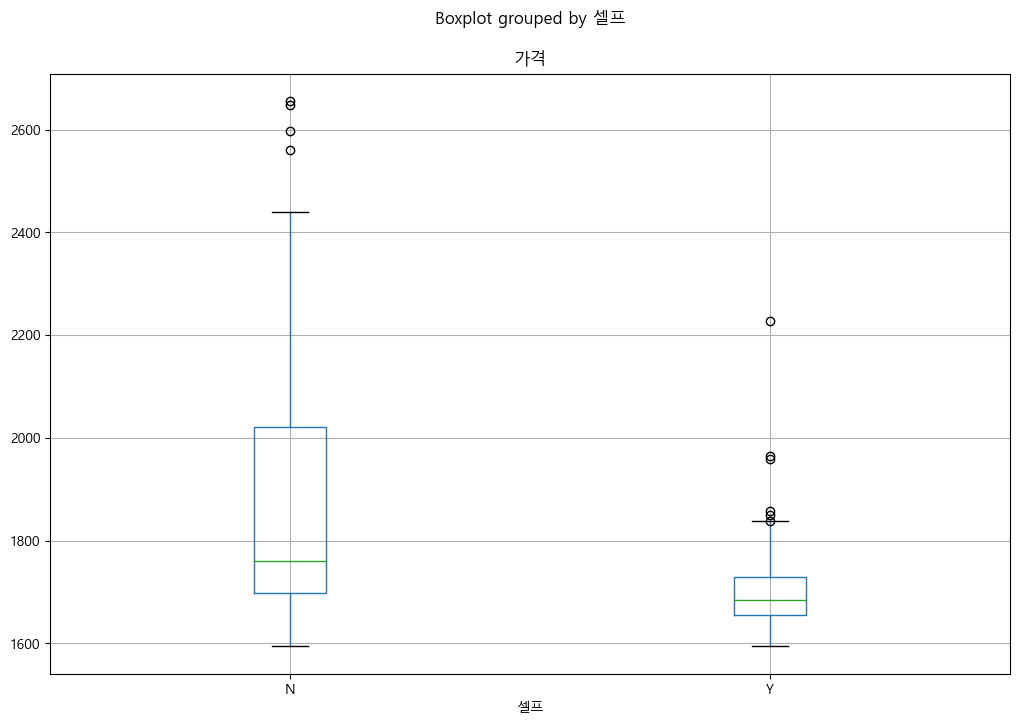

In [42]:
# boxplot(feat.boxplot)

stations.boxplot(column='가격', by = '셀프', figsize=(12, 8))

<function matplotlib.pyplot.show(close=None, block=None)>

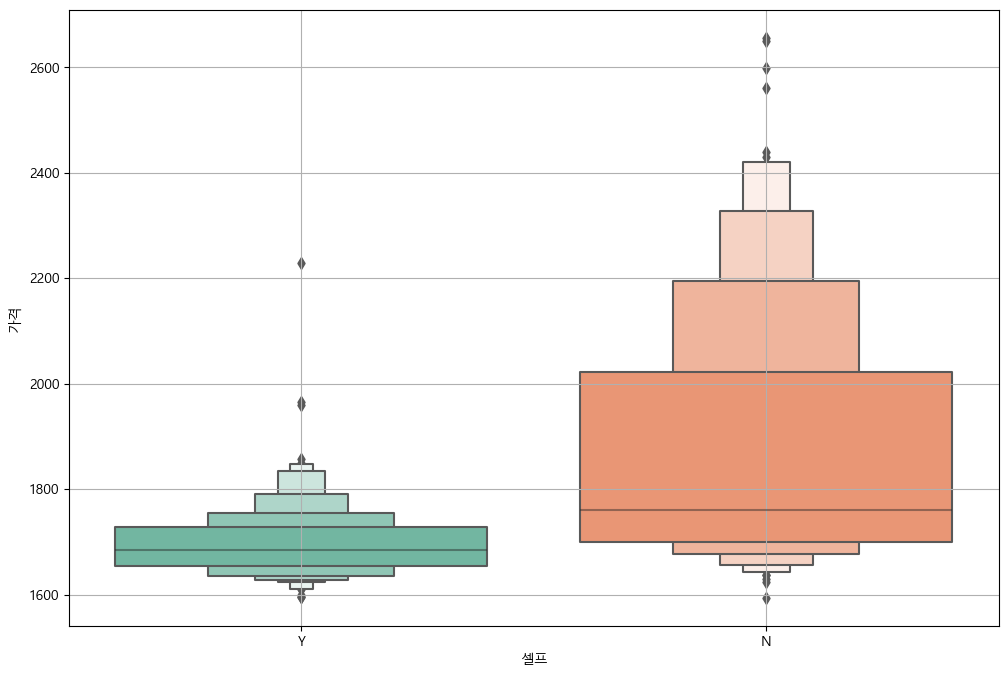

In [43]:
# boxplot(feat.seaborn)

plt.figure(figsize=(12, 8))
sns.boxenplot(x='셀프', y='가격', data=stations, palette='Set2')
plt.grid(True)
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

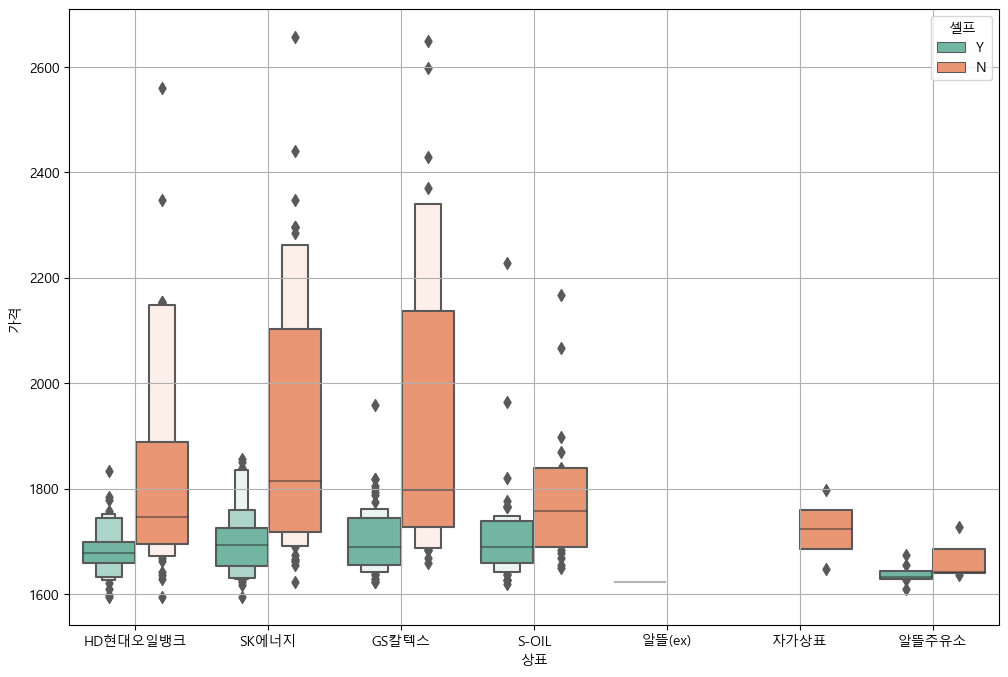

In [44]:
# boxplot(feat.seaborn)
plt.figure(figsize=(12, 8))
sns.boxenplot(x='상표', y='가격', hue='셀프', data=stations, palette='Set2') # hue= 구분 기준
plt.grid(True)
plt.show

In [45]:
# 지도 시각화

In [46]:
import json
import folium
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [47]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [49]:
# 가장 비싼 주유소 10개
stations.sort_values(by='가격', ascending=False).head(10)

,상호,주소,가격,셀프,상표,구
269,서남주유소,서울 중구 통일로 30,2656.0,N,SK에너지,중구
235,서계주유소,서울 용산구 청파로 367 (청파동),2649.0,N,GS칼텍스,용산구
433,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2598.0,N,GS칼텍스,강남구
432,(주)제이제이네트웍스 제이제이주유소,서울 강남구 언주로 716,2560.0,N,HD현대오일뱅크,강남구
431,SK논현주유소,서울 강남구 논현로 747 (논현동),2440.0,N,SK에너지,강남구
268,필동주유소,서울 중구 퇴계로 196 (필동2가),2429.0,N,GS칼텍스,중구
259,경복궁주유소,서울 종로구 율곡로 6 (중학동),2370.0,N,GS칼텍스,종로구
258,SK북악주유소,서울 종로구 평창문화로 137,2348.0,N,SK에너지,종로구
430,㈜새서울석유 새서울주유소,서울 강남구 압구정로 154,2348.0,N,HD현대오일뱅크,강남구
360,구로주유소,서울 구로구 구로동로 137 (구로동),2340.0,N,GS칼텍스,구로구


In [50]:
# 가장 값싼 주유소 10개
stations.sort_values(by='가격', ascending=True).head(10)

,상호,주소,가격,셀프,상표,구
236,(주)디오티디 은평유니콘주유소,서울 은평구 통일로 1151 (진관동),1594.0,N,HD현대오일뱅크,은평구
343,서서울고속주유소,서울 구로구 경인로 150 (오류동),1595.0,Y,SK에너지,구로구
342,㈜자연에너지 고척주유소,서울 구로구 고척로 199 (고척동),1595.0,Y,HD현대오일뱅크,구로구
344,(주)서울에너지 궁동주유소,서울 구로구 오리로 1299 (궁동),1599.0,Y,HD현대오일뱅크,구로구
283,이케이에너지(주) 강서주유소,서울 강서구 화곡로 273 (화곡동),1610.0,Y,HD현대오일뱅크,강서구
284,화곡역주유소,서울 강서구 강서로 154 (화곡동),1610.0,Y,알뜰주유소,강서구
285,강서오곡셀프주유소,서울 강서구 벌말로 254 (오곡동),1617.0,Y,SK에너지,강서구
260,다산주유소,서울 중구 다산로 233,1619.0,Y,S-OIL,중구
386,이케이에너지 주식회사,서울 도봉구 도봉로 941 (도봉동),1621.0,Y,HD현대오일뱅크,도봉구
163,플라트(주)서호주유소,서울 양천구 남부순환로 317,1624.0,Y,GS칼텍스,양천구


In [51]:
import numpy as np

gu_data = pd.pivot_table(data=stations, index='구', values='가격', aggfunc=np.mean)
gu_data.head()

,가격
구,
강남구,1960.406250
강동구,1823.846154
강북구,1659.333333
강서구,1711.454545
관악구,1736.214286


In [62]:
geo_path = "../data/02. skorea_municipalities_geo_simple.json"
geo_str = json.load(open(geo_path, encoding="utf-8"))

my_map = folium.Map(location=[37.5502, 126.982], zoom_start=10.5, tiles = 'Stamen Toner')
my_map

ValueError: Custom tiles must have an attribution.